In [1]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../01_preprocess/preprocessed_new.csv')

# Display the DataFrame
df.head()


,config_name,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,const_enablePrefix,...,instr,L1_miss,LLC_miss,br_miss,task,scale,IPC,CPU,GHz,time
0,hash,16,1,0,0,0,1,0,0,1,...,1920.855,41.323,20.105,17.050,378.926,3549112.0,0.913,1.0,5.555,3.789680e-07
1,hash,16,1,0,0,0,1,0,0,1,...,1158.248,35.621,20.288,11.056,375.785,10000000.0,0.552,1.0,5.587,3.758000e-07
2,dense3,16,1,1,0,1,0,0,0,1,...,1603.539,56.806,31.093,17.707,487.910,4518270.0,0.590,1.0,5.571,4.880186e-07
3,dense3,16,1,1,0,1,0,0,0,1,...,1186.113,45.822,28.038,13.457,511.069,10000000.0,0.415,1.0,5.596,5.111000e-07
4,hints,16,1,0,0,0,0,0,0,1,...,1611.165,59.064,30.985,17.691,484.331,4355364.0,0.599,1.0,5.555,4.842305e-07


In [2]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()[:3]
unique_values



{'config_name': array(['hash', 'dense3', 'hints'], dtype=object),
 'const_basicHintCount': array([16]),
 'const_enableBasicHead': array([1]),
 'const_enableDense': array([0, 1]),
 'const_enableDense2': array([0]),
 'const_enableDensifySplit': array([0, 1]),
 'const_enableHash': array([1, 0]),
 'const_enableHashAdapt': array([0]),
 'const_enableHeadNode': array([0]),
 'const_enablePrefix': array([1]),
 'const_hashSimdWidth': array([32]),
 'const_hashSortUseStdMerge': array([1]),
 'const_hashUseCrc32': array([0]),
 'const_hashUseSimd': array([1]),
 'const_headNode4HintCount': array([16]),
 'const_headNode8HintCount': array([16]),
 'const_pageSizeInner': array([2048, 8192, 4096]),
 'const_pageSizeLeaf': array([8192, 2048, 4096]),
 'data_name': array(['data/urls'], dtype=object),
 'data_size': array([3549112, 4518270, 4355364]),
 'data_sorted': array([0]),
 'density': array([0.565766, 0.981231, 0.549877]),
 'op': array(['ycsb_c_init', 'ycsb_c', 'ycsb_e_init'], dtype=object),
 'payload_size

In [3]:
# Convert 'time' and other fields to numerical if they are not
#df['time'] = pd.to_numeric(df['time'], errors='coerce')
import seaborn as sns
import matplotlib.pyplot as plt
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time']
correlation_matrix

,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,const_enablePrefix,const_hashSimdWidth,...,instr,L1_miss,LLC_miss,br_miss,task,scale,IPC,CPU,GHz,time
const_basicHintCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
const_enableBasicHead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
const_enableDense,NaN,NaN,1.000000,NaN,1.000000,-0.494615,NaN,NaN,NaN,NaN,...,-0.059971,0.120064,0.125684,0.002207,0.045242,-0.013282,-0.106569,NaN,0.090451,0.045243
const_enableDense2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
const_enableDensifySplit,NaN,NaN,1.000000,NaN,1.000000,-0.494615,NaN,NaN,NaN,NaN,...,-0.059971,0.120064,0.125684,0.002207,0.045242,-0.013282,-0.106569,NaN,0.090451,0.045243
const_enableHash,NaN,NaN,-0.494615,NaN,-0.494615,1.000000,NaN,NaN,NaN,NaN,...,0.112178,-0.244806,-0.265464,-0.021476,-0.112236,0.003896,0.231558,NaN,-0.188312,-0.112237
const_enableHashAdapt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
const_enableHeadNode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
const_enablePrefix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
const_hashSimdWidth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Remove rows and columns with NaN values
correlation_matrix = correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

correlation_matrix

,const_enableDense,const_enableDensifySplit,const_enableHash,const_pageSizeInner,const_pageSizeLeaf,data_size,density,rand_seed,ycsb_zipf,nodeCount_Leaf,...,cycle,instr,L1_miss,LLC_miss,br_miss,task,scale,IPC,GHz,time
const_enableDense,1.000000,1.000000,-0.494615,0.000847,0.023011,-0.012143,-0.008776,-0.000342,0.019808,0.317457,...,0.046565,-0.059971,0.120064,0.125684,0.002207,0.045242,-0.013282,-0.106569,0.090451,0.045243
const_enableDensifySplit,1.000000,1.000000,-0.494615,0.000847,0.023011,-0.012143,-0.008776,-0.000342,0.019808,0.317457,...,0.046565,-0.059971,0.120064,0.125684,0.002207,0.045242,-0.013282,-0.106569,0.090451,0.045243
const_enableHash,-0.494615,-0.494615,1.000000,-0.000293,-0.009911,-0.008683,0.009194,0.000364,-0.013887,-0.698862,...,-0.114903,0.112178,-0.244806,-0.265464,-0.021476,-0.112236,0.003896,0.231558,-0.188312,-0.112237
const_pageSizeInner,0.000847,0.000847,-0.000293,1.000000,0.002947,-0.004195,0.002637,0.007823,0.000893,0.002453,...,0.001770,0.011091,0.076170,0.035779,0.002378,0.001816,-0.001102,0.015998,-0.005877,0.001816
const_pageSizeLeaf,0.023011,0.023011,-0.009911,0.002947,1.000000,0.015179,-0.008501,-0.009448,0.013465,-0.472430,...,-0.008688,-0.021918,0.120918,0.139851,-0.057712,-0.008487,0.010592,0.002491,-0.029480,-0.008487
data_size,-0.012143,-0.012143,-0.008683,-0.004195,0.015179,1.000000,0.011503,0.003181,0.003664,0.217694,...,-0.020805,-0.079424,-0.028653,0.000946,-0.032884,-0.021505,0.163793,-0.052704,0.029782,-0.021501
density,-0.008776,-0.008776,0.009194,0.002637,-0.008501,0.011503,1.000000,-0.000175,-0.009755,-0.004430,...,0.000605,-0.000844,-0.002386,-0.001824,0.001041,0.000605,0.002340,-0.001280,0.000421,0.000604
rand_seed,-0.000342,-0.000342,0.000364,0.007823,-0.009448,0.003181,-0.000175,1.000000,0.000739,0.001269,...,-0.000524,0.002378,0.000638,-0.000049,0.003597,-0.001484,0.000664,0.000300,0.057113,-0.001484
ycsb_zipf,0.019808,0.019808,-0.013887,0.000893,0.013465,0.003664,-0.009755,0.000739,1.000000,0.007719,...,-0.320180,-0.001310,-0.235958,-0.333420,-0.344665,-0.316892,0.001646,0.519087,-0.398253,-0.316892
nodeCount_Leaf,0.317457,0.317457,-0.698862,0.002453,-0.472430,0.217694,-0.004430,0.001269,0.007719,1.000000,...,0.087213,-0.063844,0.091867,0.091880,0.045987,0.085126,0.040087,-0.155866,0.146761,0.085128


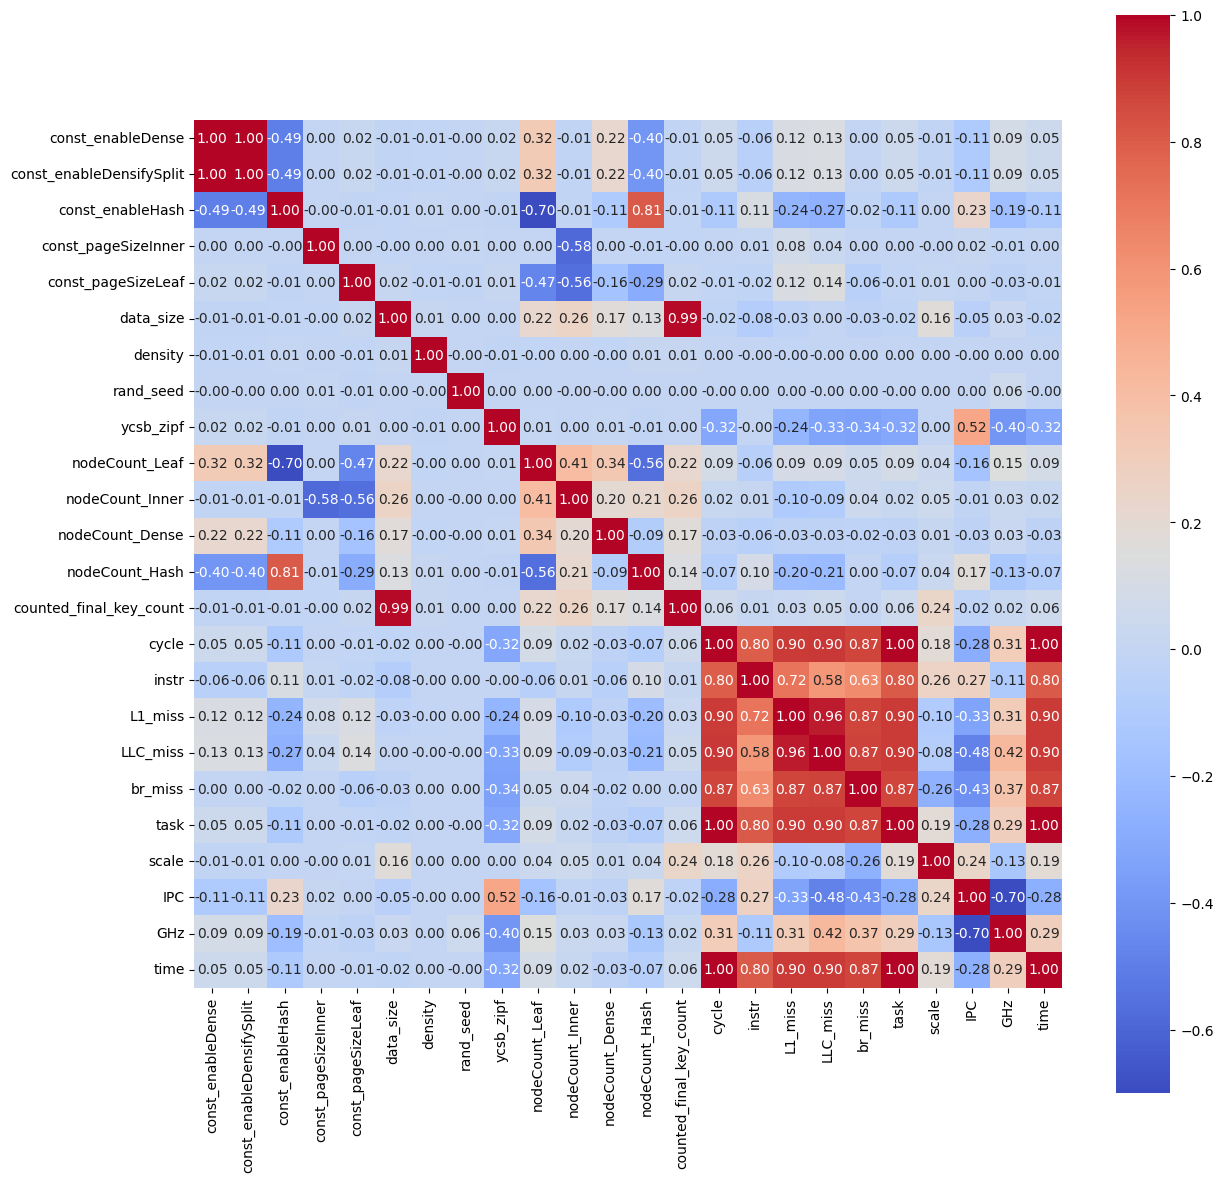

In [5]:
# Create a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')

plt.show()

In [13]:
time_correlation = correlation_matrix['time']
time_correlation = time_correlation.dropna()


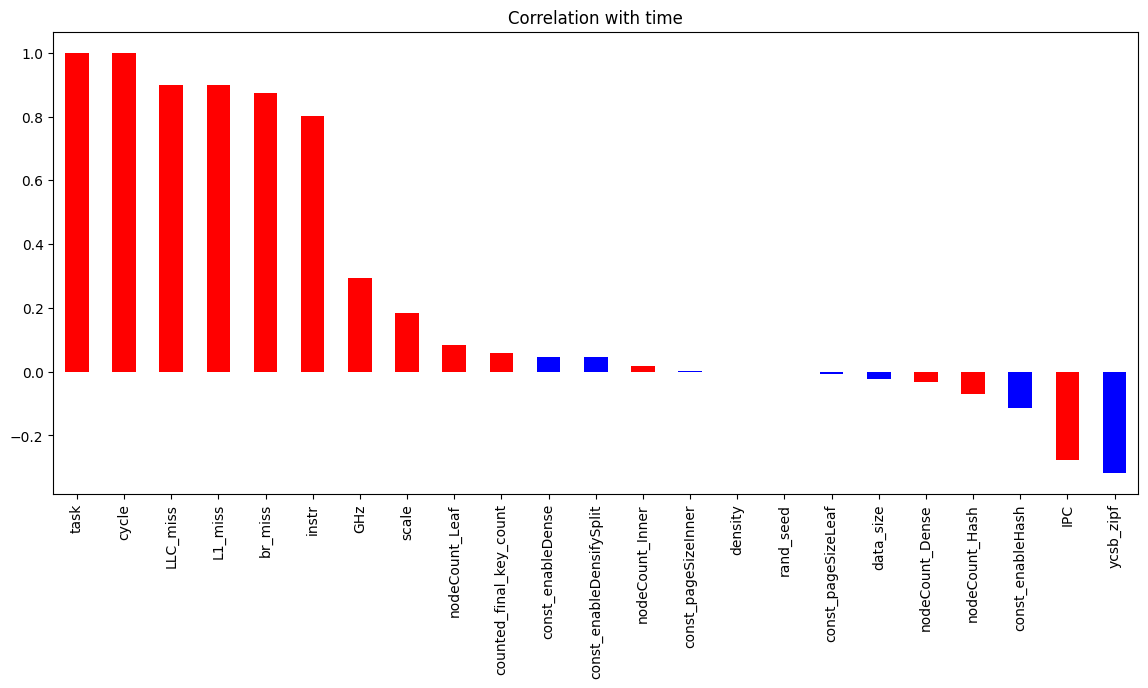

In [14]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time']

# Create a bar plot for 'time' correlation
plt.figure(figsize=(14, 6))

# Define the columns to be colored red
red_columns = ['nodeCount_Leaf','nodeCount_Inner','nodeCount_Hash','nodeCount_Dense','cycle', 'instr', 'LLC_miss','CPU','L1_miss', 'br_miss', 'scale', 'counted_final_key_count', 'GHz', 'time', 'task', 'IPC']

# Create a color list where columns in red_columns are colored red
colors = ['r' if x in red_columns else 'b' for x in time_correlation.drop('time').sort_values(ascending=False).index]
time_correlation = time_correlation.dropna()

time_correlation.drop('time').sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Correlation with time')
plt.show()

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time']

# Create a bar plot for 'time' correlation
plt.figure(figsize=(14, 6))

# Define the columns to be colored red
red_columns = ['cycle', 'instr', 'LLC_miss','CPU','L1_miss', 'br_miss', 'scale', 'counted_final_key_count', 'GHz', 'time', 'task', 'IPC']

# Create a color list where columns in red_columns are colored red
colors = ['r' if x in red_columns else 'b' for x in time_correlation.drop('time').sort_values(ascending=False).index]

time_correlation.drop('time').sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Correlation with time')
plt.show()

ValueError: could not convert string to float: 'hash'

Highlight each 10 percentile

In [6]:
# drop output values except time 
df.drop(['cycle', 'instr', 'LLC_miss','CPU','L1_miss', 'br_miss', 'scale', 'counted_final_key_count', 'GHz'], axis=1, inplace=True)
df.head()

,config_name,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,const_enablePrefix,...,nodeCount_Leaf,nodeCount_Inner,nodeCount_Dense,nodeCount_Hash,nodeCount_Head4,nodeCount_Head8,nodeCount_Dense2,task,IPC,time
0,hash,16,1,0,0,0,1,0,0,1,...,0.0,846.0,0.0,121433.0,0.0,0.0,0.0,392.291,0.877,3.923144e-07
1,hash,16,1,0,0,0,1,0,0,1,...,0.0,846.0,0.0,121433.0,0.0,0.0,0.0,194.439,1.059,1.944000e-07
2,dense3,16,1,1,0,1,0,0,0,1,...,38703.0,270.0,0.0,0.0,0.0,0.0,0.0,481.293,0.582,4.814254e-07
3,dense3,16,1,1,0,1,0,0,0,1,...,38703.0,270.0,0.0,0.0,0.0,0.0,0.0,500.832,0.431,5.009000e-07
4,hints,16,1,0,0,0,0,0,0,1,...,27850.0,742.0,0.0,0.0,0.0,0.0,0.0,505.257,0.532,5.052004e-07


In [6]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(['object']).columns

# Apply one-hot encoding to non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_columns)

In [7]:
# Calculate the percentile brackets
df['percentile bracket'] = pd.qcut(df['time'], q=10, labels=False, duplicates='drop') + 1

# Display the updated DataFrame
df.head()


,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,const_enablePrefix,const_hashSimdWidth,...,IPC,config_name_dense3,config_name_hash,config_name_hints,data_name_data/urls,op_ycsb_c,op_ycsb_c_init,op_ycsb_e,op_ycsb_e_init,percentile bracket
0,16,1,0,0,0,1,0,0,1,32,...,0.877,False,True,False,True,False,True,False,False,5
1,16,1,0,0,0,1,0,0,1,32,...,1.059,False,True,False,True,True,False,False,False,4
2,16,1,1,0,1,0,0,0,1,32,...,0.582,True,False,False,True,False,True,False,False,3
3,16,1,1,0,1,0,0,0,1,32,...,0.431,True,False,False,True,True,False,False,False,8
4,16,1,0,0,0,0,0,0,1,32,...,0.532,False,False,True,True,False,False,False,True,6


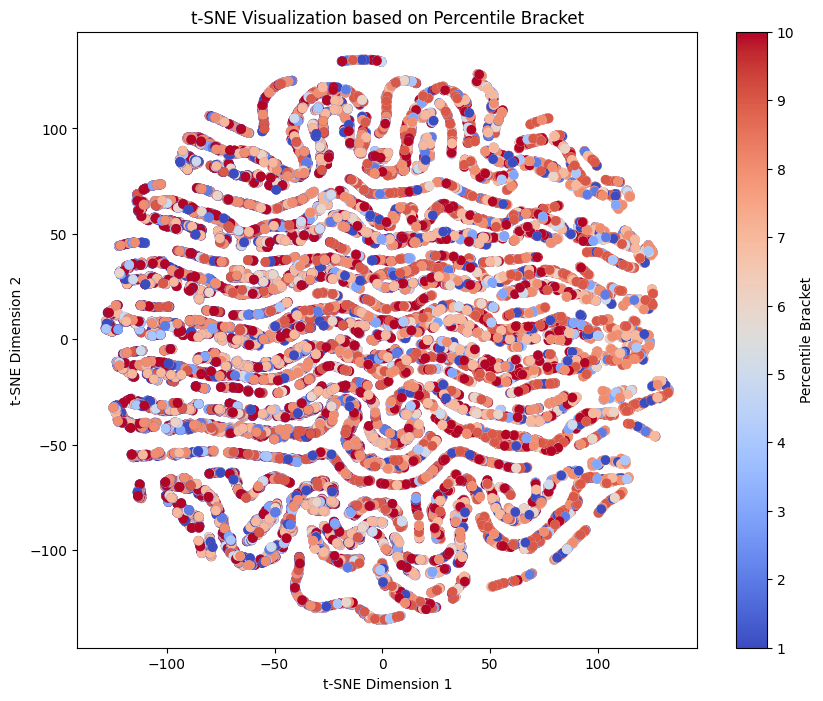

In [8]:
from sklearn.manifold import TSNE

# Create a t-SNE instance
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_data = tsne.fit_transform(df.drop(['time', 'percentile bracket'], axis=1))

# Create a scatter plot of the t-SNE data
plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=df['percentile bracket'], cmap='coolwarm')
plt.colorbar(label='Percentile Bracket')
plt.title('t-SNE Visualization based on Percentile Bracket')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


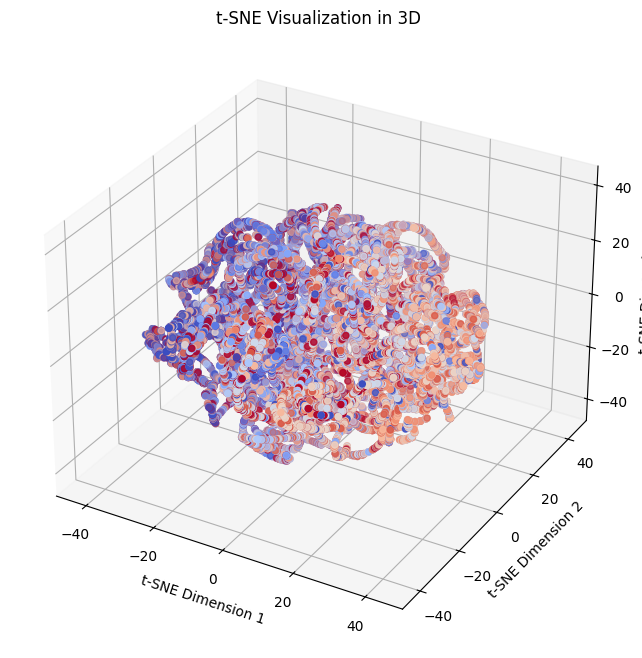

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Run t-SNE algorithm with 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
tsne_data = tsne.fit_transform(df.drop(['time', 'percentile bracket'], axis=1))

# Create a 3D scatter plot of the t-SNE data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=df['percentile bracket'], cmap='coolwarm')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.title('t-SNE Visualization in 3D')
plt.show()
